### Forecasting Time series Example 1.10:
In the following we simulate data from an AR(1) process and predict some future values given these data. We build the model on a subset of the generated data, i.e. we cut off some of the values at the end. We will predict these values and study the residuals.

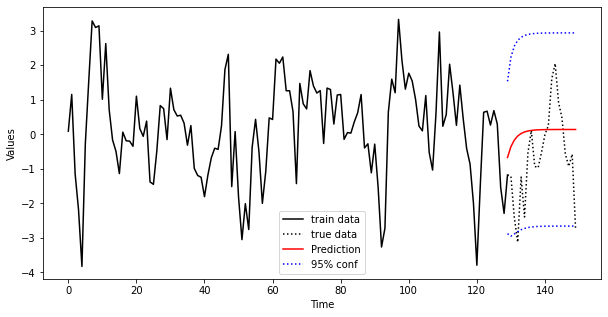

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Simulate AR1 Data
np.random.seed(8)
ar1 = [1, -0.7]

simulated_data = ArmaProcess(ar1)
simulated_data = simulated_data.generate_sample(nsample=150)

# Fit model on first 130 points
model = ARIMA(simulated_data[0:130], order=(1, 0, 0)).fit(method="yule_walker")

# Predict last 20 points
pred = model.get_prediction(start=130, end=150).prediction_results
pred_cov = pred._forecasts_error_cov
pred = pred._forecasts[0]
pred_upper = pred + 1.96 * np.sqrt(pred_cov[0][0])
pred_lower = pred - 1.96 * np.sqrt(pred_cov[0][0])

# Plot
x = np.arange(151)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[0:130], simulated_data[0:130], '-k', label='train data')
ax.plot(x[129:150], simulated_data[129:150], ':k', label='true data')
ax.plot(x[129:150], pred, 'r', label='Prediction')
ax.plot(x[129:150], pred_upper, ':b', label='95% conf')
ax.plot(x[129:150], pred_lower, ':b')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()


Finally, we add some confidence bands to the plot. To this end, we use the standard error that is stored in `._forecasts_error_cov`. The figure shows the complete data (dotted black) and the training set which consists of the the first 130 observations (solid black). From these data an AR(1) model is built and the values for the remaining 20 observations are predicted (solid red) including confidence limits (dashed red). We see that the true values of the process are within the confidence limits.